<a href="https://colab.research.google.com/github/alexseungminhan/Python-Colab-Data-Analysis/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''
!pip install kaggle
!mkdir -p ~./kaggle
!cp /content/drive/MyDrive/Project/kaggle.json ~./kaggle
!ls  ~./kaggle
'''

'\n!pip install kaggle\n!mkdir -p ~./kaggle\n!cp /content/drive/MyDrive/Project/kaggle.json ~./kaggle\n!ls  ~./kaggle\n'

In [ ]:
! kaggle datasets download -d uciml/mushroom-classification

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0
mushroom-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
'''
!unzip /content/mushroom-classification.zip -d /content/drive/MyDrive/Project/mushroom
'''

Archive:  /content/mushroom-classification.zip
replace /content/drive/MyDrive/Project/mushroom/mushrooms.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
filename ="/content/drive/MyDrive/Project/mushroom/mushrooms.csv"
mushroom = pd.read_csv(filename)
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


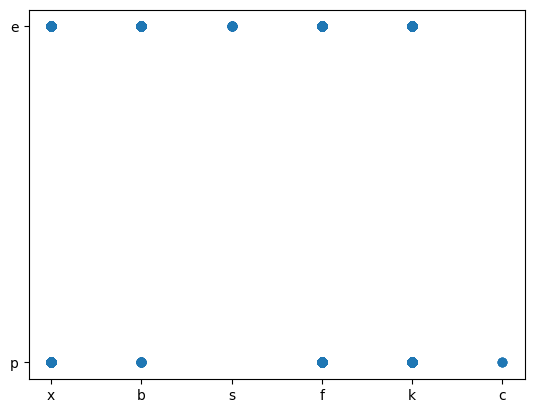

In [ ]:
import matplotlib.pyplot as plt

X = mushroom['cap-shape']
Y = mushroom['class']
plt.scatter(X,Y)
plt.show()

In [ ]:
mushroom_shape=mushroom.groupby(['cap-shape','class']).count()
mushroom_shape = mushroom_shape.unstack(level=-1,fill_value=0)
mushroom_shape = mushroom_shape['cap-surface']

In [ ]:
mushroom_shape['per_e'] = round((mushroom_shape['e']/(mushroom_shape['e']+mushroom_shape['p']))*100)
mushroom_shape['per_p'] = round((mushroom_shape['p']/(mushroom_shape['e']+mushroom_shape['p']))*100)
mushroom_shape

class,e,p,per_e,per_p
cap-shape,,,,
b,404,48,89.0,11.0
c,0,4,0.0,100.0
f,1596,1556,51.0,49.0
k,228,600,28.0,72.0
s,32,0,100.0,0.0
x,1948,1708,53.0,47.0


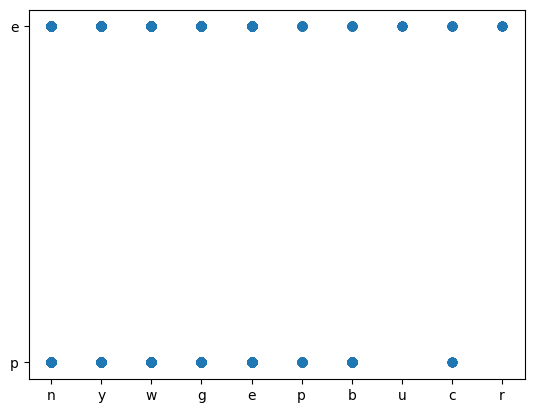

In [ ]:
X = mushroom['cap-color']
Y = mushroom['class']
plt.scatter(X,Y)
plt.show()

In [ ]:
mushroom_color=mushroom.groupby(['cap-color','class']).count()
mushroom_color = mushroom_color.unstack(level=-1,fill_value=0)
mushroom_color=mushroom_color['cap-surface']

In [ ]:
mushroom_color['per_e'] = round((mushroom_color['e']/(mushroom_color['e']+mushroom_color['p']))*100)
mushroom_color['per_p'] = round((mushroom_color['p']/(mushroom_color['e']+mushroom_color['p']))*100)
mushroom_color

class,e,p,per_e,per_p
cap-color,,,,
b,48,120,29.0,71.0
c,32,12,73.0,27.0
e,624,876,42.0,58.0
g,1032,808,56.0,44.0
n,1264,1020,55.0,45.0
p,56,88,39.0,61.0
r,16,0,100.0,0.0
u,16,0,100.0,0.0
w,720,320,69.0,31.0


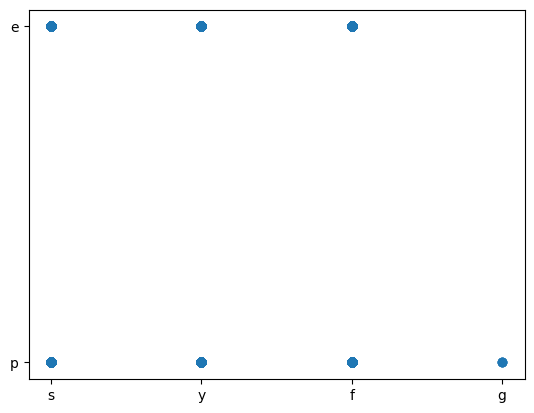

In [ ]:
X = mushroom['cap-surface']
Y = mushroom['class']
plt.scatter(X,Y)
plt.show()

In [ ]:
mushroom_surface=mushroom.groupby(['cap-surface','class']).count()
mushroom_surface = mushroom_surface.unstack(level=-1,fill_value=0)
mushroom_surface=mushroom_surface['cap-shape']

In [ ]:
mushroom_surface['per_e'] = round((mushroom_surface['e']/(mushroom_surface['e']+mushroom_surface['p']))*100)
mushroom_surface['per_p'] = round((mushroom_surface['p']/(mushroom_surface['e']+mushroom_surface['p']))*100)
mushroom_surface

class,e,p,per_e,per_p
cap-surface,,,,
f,1560,760,67.0,33.0
g,0,4,0.0,100.0
s,1144,1412,45.0,55.0
y,1504,1740,46.0,54.0


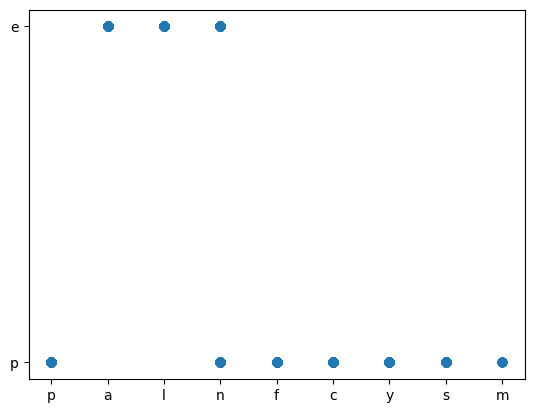

In [ ]:
X = mushroom['odor']
Y = mushroom['class']
plt.scatter(X,Y)
plt.show()

In [ ]:
mushroom_odor=mushroom.groupby(['odor','class']).count()
mushroom_odor = mushroom_odor.unstack(level=-1,fill_value=0)
mushroom_odor=mushroom_odor['cap-shape']

In [ ]:
mushroom_odor['per_e'] = round((mushroom_odor['e']/(mushroom_odor['e']+mushroom_odor['p']))*100)
mushroom_odor['per_p'] = round((mushroom_odor['p']/(mushroom_odor['e']+mushroom_odor['p']))*100)
mushroom_odor

class,e,p,per_e,per_p
odor,,,,
a,400,0,100.0,0.0
c,0,192,0.0,100.0
f,0,2160,0.0,100.0
l,400,0,100.0,0.0
m,0,36,0.0,100.0
n,3408,120,97.0,3.0
p,0,256,0.0,100.0
s,0,576,0.0,100.0
y,0,576,0.0,100.0


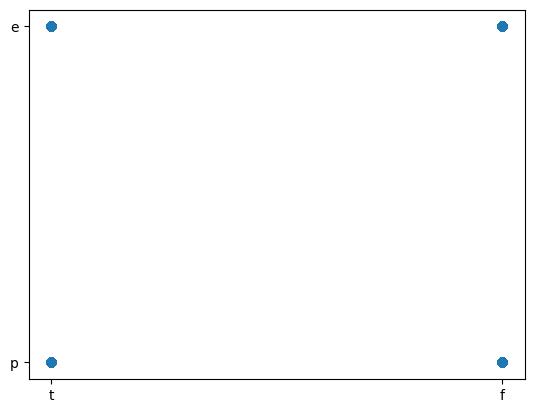

In [ ]:
X = mushroom['bruises']
Y = mushroom['class']
plt.scatter(X,Y)
plt.show()

In [ ]:
mushroom_bruises=mushroom.groupby(['bruises','class']).count()
mushroom_bruises = mushroom_bruises.unstack(level=-1,fill_value=0)
mushroom_bruises=mushroom_bruises['cap-shape']

In [ ]:
mushroom_bruises['per_e'] = round((mushroom_bruises['e']/(mushroom_bruises['e']+mushroom_bruises['p']))*100)
mushroom_bruises['per_p'] = round((mushroom_bruises['p']/(mushroom_bruises['e']+mushroom_bruises['p']))*100)
mushroom_bruises

class,e,p,per_e,per_p
bruises,,,,
f,1456,3292,31.0,69.0
t,2752,624,82.0,18.0


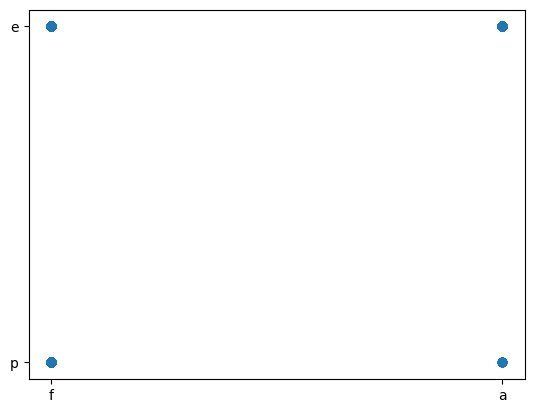

In [ ]:
X = mushroom['gill-attachment']
Y = mushroom['class']
plt.scatter(X,Y)
plt.show()

In [ ]:
mushroom_gill_attachment=mushroom.groupby(['gill-attachment','class']).count()
mushroom_gill_attachment = mushroom_gill_attachment.unstack(level=-1,fill_value=0)
mushroom_gill_attachment=mushroom_gill_attachment['cap-shape']

In [ ]:
mushroom_gill_attachment['per_e'] = round((mushroom_gill_attachment['e']/(mushroom_gill_attachment['e']+mushroom_gill_attachment['p']))*100)
mushroom_gill_attachment['per_p'] = round((mushroom_gill_attachment['p']/(mushroom_gill_attachment['e']+mushroom_gill_attachment['p']))*100)
mushroom_gill_attachment

class,e,p,per_e,per_p
gill-attachment,,,,
a,192,18,91.0,9.0
f,4016,3898,51.0,49.0


Index(['e', 'p', 'per_e', 'per_p'], dtype='object', name='class')
Index(['e', 'p', 'per_e', 'per_p'], dtype='object', name='class')


Text(0.5, 1.0, 'mushroom color vs. edibility')

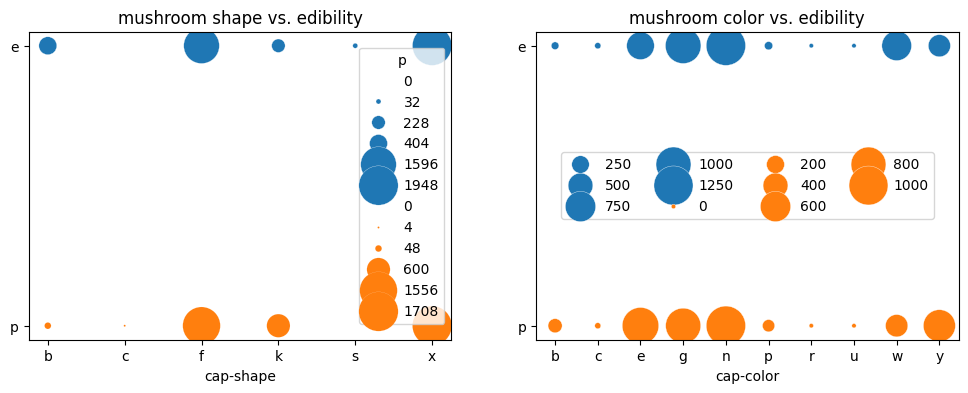

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)

data = mushroom_shape
print(data.columns)
X = data.index
Y = ['e' for _ in range(len(X))]

size = data['e']
sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))
X = data.index
Y = ['p' for _ in range(len(X))]

size = data['p']
sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))

plt.title("mushroom shape vs. edibility")

plt.subplot(1,2,2)

data = mushroom_color
print(data.columns)
X = data.index
Y = ['e' for _ in range(len(X))]

size = data['e']
sns.scatterplot(x=X,y=Y,size=size,sizes=(10,800))
X = data.index
Y = ['p' for _ in range(len(X))]

size = data['p']
sns.scatterplot(x=X,y=Y,size=size,sizes=(10,800))
plt.legend(loc='center', ncol=4)
plt.title("mushroom color vs. edibility")

Index(['e', 'p', 'per_e', 'per_p'], dtype='object', name='class')
Index(['e', 'p', 'per_e', 'per_p'], dtype='object', name='class')
Index(['e', 'p', 'per_e', 'per_p'], dtype='object', name='class')
Index(['e', 'p', 'per_e', 'per_p'], dtype='object', name='class')
Index(['e', 'p', 'per_e', 'per_p'], dtype='object', name='class')
Index(['e', 'p', 'per_e', 'per_p'], dtype='object', name='class')


Text(0.5, 1.0, 'mushroom gill attachment vs. edibility')

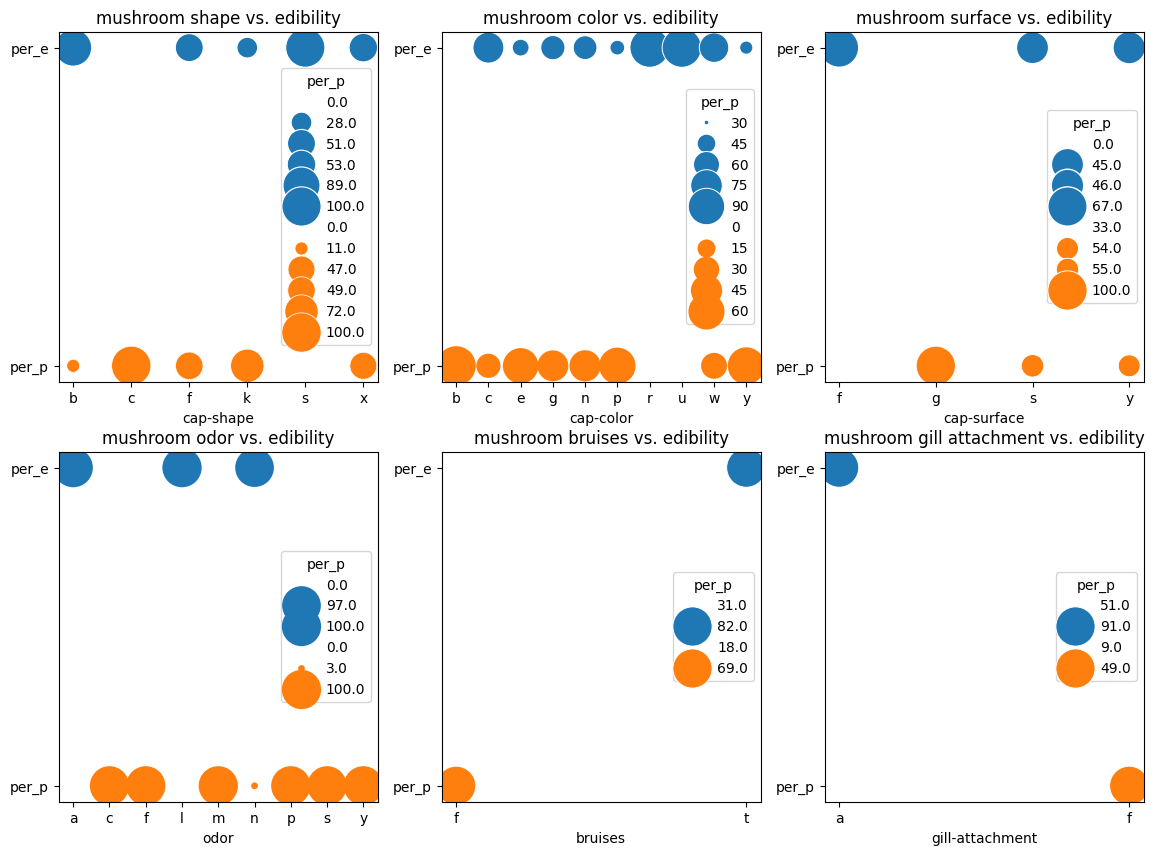

In [ ]:
plt.figure(figsize=(14,10))

plt.subplot(2,3,1)

data = mushroom_shape

print(data.columns)
X = data.index
Y = ['per_e' for _ in range(len(X))]

size = data['per_e']
sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))
X = data.index
Y = ['per_p' for _ in range(len(X))]
size = data['per_p']


sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))

plt.title("mushroom shape vs. edibility")

plt.subplot(2,3,2)

data = mushroom_color

print(data.columns)
X = data.index
Y = ['per_e' for _ in range(len(X))]

size = data['per_e']
sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))
X = data.index
Y = ['per_p' for _ in range(len(X))]
size = data['per_p']

#plt.scatter(x=X,y=Y,s=size,sizes=(0,800),cmap="coolwarm",aplha=0.5)
sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))
plt.title("mushroom color vs. edibility")

plt.subplot(2,3,3)

data = mushroom_surface

print(data.columns)
X = data.index
Y = ['per_e' for _ in range(len(X))]

size = data['per_e']
sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))
X = data.index
Y = ['per_p' for _ in range(len(X))]
size = data['per_p']

sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))

plt.title("mushroom surface vs. edibility")

plt.subplot(2,3,4)

data = mushroom_odor

print(data.columns)
X = data.index
Y = ['per_e' for _ in range(len(X))]

size = data['per_e']
sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))
X = data.index
Y = ['per_p' for _ in range(len(X))]
size = data['per_p']

sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))

plt.title("mushroom odor vs. edibility")

plt.subplot(2,3,5)

data = mushroom_bruises

print(data.columns)
X = data.index
Y = ['per_e' for _ in range(len(X))]

size = data['per_e']
sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))
X = data.index
Y = ['per_p' for _ in range(len(X))]
size = data['per_p']

sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))

plt.title("mushroom bruises vs. edibility")

plt.subplot(2,3,6)

data = mushroom_gill_attachment

print(data.columns)
X = data.index
Y = ['per_e' for _ in range(len(X))]

size = data['per_e']
sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))
X = data.index
Y = ['per_p' for _ in range(len(X))]
size = data['per_p']

sns.scatterplot(x=X,y=Y,size=size,sizes=(0,800))

plt.title("mushroom gill attachment vs. edibility")
